In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

<a id="section_toc"></a> 


## Tabla de Contenidos

[1-Importación de datos](#section1)

[2-Analisis exploratorio](#section2)

$\hspace{.5cm}$[2.1-Info, Nulos, Describe](#section21)

$\hspace{.5cm}$[2.2-Conto de Valores por columnna](#section22)

$\hspace{.5cm}$[2.2-Conto de Valores por columnna](#section22)


$\hspace{.5cm}$[2.3-Análisis del valor del tipo de cambio utilizado](#section6)

$\hspace{.5cm}$[2.4-Análisis columna place_with_parent_names](#section7)

$\hspace{.5cm}$[2.5 -Análisis Barrios de Capital Federal](#section8)

$\hspace{.5cm}$[2.6-Analisis Duplicados](#section10)

$\hspace{.5cm}$[2.7-Análisis de valores extremos en surface_covered](#section5)

[3-Resumen de información ](#section30)

$\hspace{.5cm}$[3.1-Tabla: Precio promedio por m2 agrupado por Provincia ](#section31)

$\hspace{.5cm}$[3.2-Tabla: Precio promedio del m2 agrupado por intervalos de superficie](#section4)

$\hspace{.5cm}$[3.3-Ranking cantidad de Publicaciones por state_name](#section33)

$\hspace{.5cm}$[3.4-Estadisticas de precios agrupados por state_name](#section9)

$\hspace{.5cm}$[3.5-Estadisticas de precios agrupados por property_type](#section9)





<a id="section1"></a> 
### 1-Importación de datos

[volver a TOC](#section_toc)


In [2]:
data_loc="../Data/properatti.csv"
data=pd.read_csv(data_loc)


In [3]:
pd.set_option('display.max_columns', 500)
data.head(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


<a id="section2"></a> 
### 2-Analisis exploratorio
[volver a TOC](#section_toc)


<a id="section21"></a> 
### 2.1-Info, Nulos, Describe
[volver a TOC](#section_toc)

In [4]:
data.info()
#OBSERVACION: las columnas con datos numericos estan como float64, en principio no hay que hacer limpieza sobre eso

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

In [5]:
#%nulos por columna
cant_nulos_por_campo =data.apply(lambda x: x.isnull().sum(), axis=0)
cant_registros = data.shape[0]
porc_nulos_por_campo = 100 * cant_nulos_por_campo / cant_registros
print(porc_nulos_por_campo)

Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.001650
title                          0.000000


In [6]:
data.describe().round(0)

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.0,102503.0,69670.0,69670.0,100810.0,100810.0,100810.0,81892.0,101313.0,68617.0,87658.0,7899.0,47390.0,14262.0
mean,60610.0,3574442.0,-35.0,-59.0,468526.0,4229397.0,239701.0,234.0,133.0,2160.0,6912.0,17.0,3.0,5009.0
std,34993.0,354131.0,2.0,2.0,2260101.0,6904714.0,391324.0,1782.0,724.0,2759.0,28379.0,120.0,2.0,120440.0
min,0.0,3427208.0,-55.0,-76.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0
25%,30305.0,3430234.0,-35.0,-59.0,110000.0,1583309.0,89734.0,50.0,45.0,1218.0,1550.0,1.0,2.0,1000.0
50%,60610.0,3433910.0,-35.0,-58.0,185000.0,2558452.0,145000.0,84.0,75.0,1800.0,2213.0,3.0,3.0,2000.0
75%,90914.0,3836668.0,-34.0,-58.0,420000.0,4675792.0,265000.0,200.0,150.0,2486.0,3356.0,6.0,4.0,4000.0
max,121219.0,6948895.0,5.0,-54.0,650000000.0,821271104.0,46545445.0,200000.0,187000.0,206333.0,4000000.0,3150.0,32.0,10001500.0


In [7]:
#OBSERVACIONES:
#price_aprox_usd: tiene una dispersion muy alta, el valor maximio es superior a 46 millones de dolares!
#surface_total_in_m2: la media es de 234 pero el std es de 1784, tiene que haber ouliers o alguna categoria tipo rural, el max tiene 200.000 (son 200 hectareas)
#surface_covered_in_m2: mismo analisis anterior
#expenses habria que ver en que moneda esta


<a id="section22"></a> 
### 2.2-Conteo de Valores por columnna
[volver a TOC](#section_toc)

In [8]:
data["operation"].value_counts()
#observacion: son todas operaciones de venta

sell    121220
Name: operation, dtype: int64

In [9]:
data["property_type"].value_counts()
#ok 

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64

In [10]:
data["place_name"].value_counts()
#pareciera que hay datos mezclados, Ciudades en el mismo nivel que Barrios y Barrios Cerrados

Córdoba                       9254
Rosario                       8504
Mar del Plata                 6534
Tigre                         3324
Nordelta                      3315
                              ... 
Monje                            1
Navarro                          1
La Punilla                       1
Tancacha                         1
Barrio Cerrado "La Chacra"       1
Name: place_name, Length: 1060, dtype: int64

In [11]:
data["place_with_parent_names"].value_counts()

|Argentina|Santa Fe|Rosario|                              8504
|Argentina|Córdoba|Córdoba|                               6606
|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|    6534
|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nordelta|       3315
|Argentina|Capital Federal|Belgrano|                      2992
                                                          ... 
|Argentina|Buenos Aires Interior|Berisso|Los Talas|          1
|Argentina|Misiones|Santa Ana|                               1
|Argentina|Santa Fe|Fighiera|                                1
|Argentina|Corrientes|Paso de los Libres|                    1
|Argentina|Santa Fe|Murphy|                                  1
Name: place_with_parent_names, Length: 1164, dtype: int64

In [12]:
data["country_name"].value_counts()
#ok, todo en Argentina

Argentina    121220
Name: country_name, dtype: int64

In [13]:
data["state_name"].value_counts()
#Provincia de Buenos Aires está separada en regiones

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
La Rioja    

In [14]:
data["currency"].value_counts()
#verificar los registros que estan en moneda que no sea ARS Y USD

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

In [15]:
data["title"].value_counts()

DEPARTAMENTO EN VENTA                                                                         4855
CASA EN VENTA                                                                                 2677
Departamento - Nueva Cordoba                                                                  1003
PH EN VENTA                                                                                    921
Departamento - Centro                                                                          685
                                                                                              ... 
PH 2 Amb al Frente en PB con Entrada Indep - Malaver 1900 Florida M                              1
Avenida Alicia Moreau De Justo 700                                                               1
Miradores de la Bahia 2 Dorm. (170513)                                                           1
Casa 432m² con Dependencias en Quintana, Pres. 2800, San Isidro, Martínez, por U$S 470.000       1
Buena casa

In [16]:
data["description"].value_counts()

AVISO LEGAL: Las descripciones arquitectónicas y funcionales, valores de expensas, impuestos y servicios, fotos y medidas de este inmueble son aproximados. Los datos fueron proporcionados por el propietario y pueden no estar actualizados a la hora de la visualización de este aviso por lo cual pueden arrojar inexactitudes y discordancias con las que surgen de los las facturas, títulos y planos legales del inmueble. Los precios indicados podrán modificarse sin previo aviso. La fechas de inicio de obra o posesión son estimadas, podrán ser reprogramadas por la Dirección de obra y dependerán a su vez de un proceso de aprobaciones municipales u otros organismos intervinientes. El interesado deberá realizar las verificaciones respectivas previamente a la realización de cualquier operación, requiriendo por sí o sus profesionales las copias necesarias de la documentación que corresponda. Venta supeditada al cumplimiento por parte del propietario de los requisitos de la resolución general Nº 237

<a id="section6"></a> 
### 2.3-Análisis del valor del tipo de cambio utilizado
[volver a TOC](#section_toc)



In [17]:

TC=data["price_aprox_local_currency"]/data["price_aprox_usd"]

In [18]:
TC.describe().round(2)
#OK, es el mismo tipo de cambio para toda la base y se corresponde con el TC vigente a esa fecha

count    100809.00
mean         17.64
std           0.00
min          17.64
25%          17.64
50%          17.64
75%          17.64
max          17.64
dtype: float64

<a id="section7"></a> 
### 2.4-Análisis columna place_with_parent_names
[volver a TOC](#section_toc)

In [19]:
data.place_with_parent_names
#observaciones: podrian separarse los campos en columnas con split y contrastr contra los campos
#country_name state name y place

0                     |Argentina|Capital Federal|Mataderos|
1               |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|
2                     |Argentina|Capital Federal|Mataderos|
3                       |Argentina|Capital Federal|Liniers|
4         |Argentina|Buenos Aires Costa Atlántica|Mar de...
                                ...                        
121215                 |Argentina|Capital Federal|Belgrano|
121216    |Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...
121217            |Argentina|Capital Federal|Villa Urquiza|
121218    |Argentina|Buenos Aires Costa Atlántica|Mar de...
121219                          |Argentina|Capital Federal|
Name: place_with_parent_names, Length: 121220, dtype: object

<a id="section8"></a> 
### 2.5-Análisis Barrios de Capital Federal
[volver a TOC](#section_toc)

In [20]:

caba_data=data[data.state_name=="Capital Federal"]
caba_barrios=caba_data["place_name"]
pd.set_option('display.max_rows', 500)

#ranking de publicaciones por barrios
caba_barrios.value_counts()


Belgrano                2992
Palermo                 2885
Caballito               2273
Villa Urquiza           1629
Recoleta                1547
Flores                  1354
Villa Crespo            1331
Capital Federal         1297
San Telmo               1216
Almagro                 1165
Barrio Norte            1140
Boedo                    890
Nuñez                    778
Balvanera                667
Puerto Madero            647
San Cristobal            614
Saavedra                 542
Monserrat                538
Palermo Hollywood        532
Floresta                 516
Villa del Parque         488
Villa Luro               432
Barracas                 425
Villa Devoto             420
Mataderos                418
Liniers                  408
Palermo Soho             394
Colegiales               352
Parque Patricios         322
Congreso                 304
Coghlan                  259
Retiro                   248
Palermo Chico            232
Chacarita                227
Centro / Micro

In [21]:
#lista de barrios por orden alfabetico
barrios_agrupados=pd.DataFrame(caba_barrios).groupby("place_name")
barrios_agrupados.sum()
#observacion= hay un barrio definido como CAPITAL FEDERAL, habria que verificar cuantos registros tieen

""
place_name
Abasto
Agronomía
Almagro
Balvanera
Barracas
Barrio Norte
Belgrano
Boca
Boedo


<a id="section10"></a> 
### 2.6-Analisis Duplicados
[volver a TOC](#section_toc)

10.1 Analisis duplicados de todos los registros

In [22]:

data.duplicated().value_counts()

False    121220
dtype: int64

Controlo duplicados con geoid

In [23]:
data.iloc[0:5, 0:11]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447


In [24]:
#verificio indices duplicados
data.index.duplicated().sum()

0

10.2 verfico duplicados en lat-lon

In [25]:
#verfico duplicados en lat-lon
lat_lon_notna_data=data[data["lat-lon"].notna()]
print("cantidad no nulos en lat-lont: ",lat_lon_notna_data.shape)
lat_lon_duplicates=lat_lon_notna_data["lat-lon"].duplicated().sum()
print("candidad duplicados en lat_lon: ",lat_lon_duplicates )
#OBSERVACION: hay demasiados nulos como para evaluar los duplicados

cantidad no nulos en lat-lont:  (69670, 26)
candidad duplicados en lat_lon:  22467


10.3 levanto la base que estuvo depurando Celeste con datos ampliados de geolacalizacion


In [26]:
data_loc_completa="../Data/data_actualizada_dos.csv"
data_completa=pd.read_csv(data_loc_completa)


In [27]:
data_completa.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'operation',
       'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', 'residecial_comercial',
       'split_Pais', 'split_Region', 'split_Provincia', 'split_Zona',
       'split_Ciudad', 'split_Barrios_CABA', 'split_Otros_datos_Zona',
       'mono_desc', 'amb_text_desc', 'amb_num_desc', 'room_expanded', 'dorm',
       'room_expanded_2', 'room_cat', 'room_fixed', 'antigüedad', 'cuota',
       'credito', 'cochera', 'seguridad', 'amenities', 'es_barrio_cerrado',
       'zona_barrio_cerrado', 'barrio', 'geometry'],
      dtype='object')

In [62]:
data_completa.geometry.notna().sum()

121220

In [29]:
data_completa.geometry.duplicated().sum()

74016

In [30]:
duplicados_geometry=data_completa[data_completa.geometry.duplicated(keep=False)]
duplicados_geometry_not_na=duplicados_geometry[duplicados_geometry.geometry.notna()]
duplicados_geometry_not_na.head(5)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,residecial_comercial,split_Pais,split_Region,split_Provincia,split_Zona,split_Ciudad,split_Barrios_CABA,split_Otros_datos_Zona,mono_desc,amb_text_desc,amb_num_desc,room_expanded,dorm,room_expanded_2,room_cat,room_fixed,antigüedad,cuota,credito,cochera,seguridad,amenities,es_barrio_cerrado,zona_barrio_cerrado,barrio,geometry
1,1,1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,residencial,Argentina,G.B.A. Zona Sur,Buenos Aires,Bs.As. G.B.A. Zona Sur,La Plata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A Estrenar,0,0,0,0,0,0,NaN,La Plata,POINT (-57.96432950000001 -34.9038831)
4,4,4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...,residencial,Argentina,B.A. Costa Atlántica,Buenos Aires,Buenos Aires Costa Atlántica,Mar del Plata,NaN,Centro,NaN,NaN,NaN,NaN,1.0,2.0,2.0,2.0,Usado,0,0,0,0,0,0,NaN,Centro,POINT (-57.5494468 -38.0026256)
7,7,7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,USD,2434941.0,138000.0,45.0,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...,residencial,Argentina,Capital Federal,Capital Federal,Capital Federal,Capital Federal,Belgrano,NaN,1.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0,A Estrenar,0,0,0,0,0,0,NaN,Belgrano,POINT (-58.443362 -34.5598729)
8,8,8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,195000.0,USD,3440677.5,195000.0,65.0,60.0,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...,residencial,Argentina,Capital Federal,Capital Federal,Capital Federal,Capital Federal,Belgrano,NaN,NaN,2.0,NaN,2.0,NaN,2.0,2.0,2.0,Usado,0,0,0,0,0,0,NaN,Belgrano,POINT (-58.443362 -34.5598729)
10,10,10,10,sell,house,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,"-31.4200833,-64.1887761",-31.420083,-64.188776,70000.0,USD,1235115.0,70000.0,1514.0,NaN,46.235139,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boy_venta_casa_c...,"Hermosa casa sin terminar de 3 dormitorios, ba...",Casa sin terminar en Falda de Cañete. ...,https://thumbs4.properati.com/3/mQkhIxXpTTbMSc...,residencial,Argentina,CENTRO,Córdoba,Córdoba,Córdoba,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,4.0,4.0,Usado,0,0,0,0,0,0,NaN,Córdoba,POINT (-64.18877610000001 -31.4200833)


In [31]:
duplicados_geometry_not_na.shape

(80790, 54)

In [32]:
#Aplicamos un groupby para agrupar los registros duplicados
duplicados_agrupados=duplicados_geometry.groupby("geometry")["geometry"].count()
duplicados_agrupados

geometry
POINT (-55.1203326 -27.4867802)                      2
POINT (-55.31666600000001 -27.600086)                2
POINT (-55.3172564 -27.6039992)                      2
POINT (-55.32384870000001 -27.604435)                7
POINT (-55.3286704 -27.6106775)                      2
                                                 ...  
POINT (-71.395403 -41.125864)                        3
POINT (-71.402288298 -41.1675963504)                19
POINT (-71.6417984 -40.7627426)                     14
POINT (-71.66351450000001 -40.75248660000001)       15
POINT (nan nan)                                  51550
Name: geometry, Length: 6774, dtype: int64

In [33]:
duplicados_agrupados[duplicados_agrupados>1]

geometry
POINT (-55.1203326 -27.4867802)                      2
POINT (-55.31666600000001 -27.600086)                2
POINT (-55.3172564 -27.6039992)                      2
POINT (-55.32384870000001 -27.604435)                7
POINT (-55.3286704 -27.6106775)                      2
                                                 ...  
POINT (-71.395403 -41.125864)                        3
POINT (-71.402288298 -41.1675963504)                19
POINT (-71.6417984 -40.7627426)                     14
POINT (-71.66351450000001 -40.75248660000001)       15
POINT (nan nan)                                  51550
Name: geometry, Length: 6774, dtype: int64

In [34]:
#Tomo una muestra para analizar los registros
duplicados_geometry[duplicados_geometry.geometry=="POINT (-55.32384870000001 -27.604435)"]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,residecial_comercial,split_Pais,split_Region,split_Provincia,split_Zona,split_Ciudad,split_Barrios_CABA,split_Otros_datos_Zona,mono_desc,amb_text_desc,amb_num_desc,room_expanded,dorm,room_expanded_2,room_cat,room_fixed,antigüedad,cuota,credito,cochera,seguridad,amenities,es_barrio_cerrado,zona_barrio_cerrado,barrio,geometry
38805,38805,38805,38805,sell,house,Misiones,|Argentina|Misiones|,Argentina,Misiones,3430657.0,"-27.604435,-55.3238487",-27.604435,-55.323849,530000.0,ARS,524471.11,29724.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/18m9a_venta_casa_m...,BARRIO : CAMPORA Aviso publicado por Pixel Inm...,*** OPORTUNIDAD!!! SE VENDE CASA***530000,https://thumbs4.properati.com/7/fNyfBU9444V4lb...,residencial,Argentina,NEA,Misiones,Misiones,Capital Federal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Usado,0,0,0,0,0,0,NaN,Misiones,POINT (-55.32384870000001 -27.604435)
40145,40145,40145,40145,sell,house,Misiones,|Argentina|Misiones|,Argentina,Misiones,3430657.0,"-27.604435,-55.3238487",-27.604435,-55.323849,650000.0,ARS,643219.30,36454.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/18qrr_venta_casa_m...,Remato!!!!!! .Excelente propiedad CON TITULO D...,***REMATO - CHACRA -PROPIEDAD. $650000,https://thumbs4.properati.com/4/LuOMX39oX4DrHG...,residencial,Argentina,NEA,Misiones,Misiones,Capital Federal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Usado,0,0,0,0,0,0,NaN,Misiones,POINT (-55.32384870000001 -27.604435)
41486,41486,41486,41486,sell,house,Misiones,|Argentina|Misiones|,Argentina,Misiones,3430657.0,"-27.604435,-55.3238487",-27.604435,-55.323849,350000.0,ARS,346348.83,19629.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/18u9a_venta_terren...,*** SE VENDE TERRENO EN EL SANA CON CASA DE MA...,*** SE VENDE TERRENO EN EL SANA CON CASA DE MA...,https://thumbs4.properati.com/2/TCgKl85dCpBXeO...,residencial,Argentina,NEA,Misiones,Misiones,Capital Federal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Usado,0,0,0,0,0,0,NaN,Misiones,POINT (-55.32384870000001 -27.604435)
41577,41577,41577,41577,sell,house,Misiones,|Argentina|Misiones|,Argentina,Misiones,3430657.0,"-27.604435,-55.3238487",-27.604435,-55.323849,530000.0,ARS,524471.11,29724.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/18ujo_venta_casa_m...,-Ubicación : 100 metros de ruta provincial 4 ....,***SE VENDE CASA EN KM 40***$530000,https://thumbs4.properati.com/3/ESQjxGe8RXRKIM...,residencial,Argentina,NEA,Misiones,Misiones,Capital Federal,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,4.0,4.0,Usado,0,0,0,0,0,0,NaN,Misiones,POINT (-55.32384870000001 -27.604435)
44503,44503,44503,44503,sell,house,Misiones,|Argentina|Misiones|,Argentina,Misiones,3430657.0,"-27.604435,-55.3238487",-27.604435,-55.323849,750000.0,ARS,742176.19,42062.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/190sf_venta_casa_m...,***SE VENDE VIVIENDA CANCELADA*** $750.000.Ter...,***SE VENDE VIVIENDA CANCELADA*** $750.000.,https://thumbs4.properati.com/7/FsfQV8PyEM8cdL...,residencial,Argentina,NEA,Misiones,Misiones,Capital Federal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Usado,0,0,0,0,0,0,NaN,Misiones,POINT (-55.32384870000001 -27.604435)
50849,50849,50849,50849,sell,apartment,Misiones,|Argentina|Misiones|,Argentina,Misiones,3430657.0,"-27.604435,-55.3238487",-27.604435,-55.323849,550000.0,ARS,544262.59,30846.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/19fuh_venta_depart...,OPORTUNIDAD!!! $550.000.***SE VENDE TERRENO CO...,OPORTUNIDAD!!! $550.000. ***SE VENDE TERRENO C...,https://thumbs4.properati.com/9/4d5HbQPPcEtHTN...,residencial,Argentina,NEA,Misiones,Misiones,Capital Federal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Usado,0,

In [35]:
#OBSERVACION: no parecieran ser duplicados, los precios y superficies son distintas
#y las descripciones tambien son muy distintas, se chequeo la georeferenciacion en googlemaps y 
#parece ser una zona residencial de misiones

In [36]:
duplicados_geometry[duplicados_geometry.geometry=="POINT (-55.31666600000001 -27.600086)"]
#ok, no parecieran ser datos duplicados

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,residecial_comercial,split_Pais,split_Region,split_Provincia,split_Zona,split_Ciudad,split_Barrios_CABA,split_Otros_datos_Zona,mono_desc,amb_text_desc,amb_num_desc,room_expanded,dorm,room_expanded_2,room_cat,room_fixed,antigüedad,cuota,credito,cochera,seguridad,amenities,es_barrio_cerrado,zona_barrio_cerrado,barrio,geometry
38794,38794,38794,38794,sell,house,Misiones,|Argentina|Misiones|,Argentina,Misiones,3430657.0,"-27.600086,-55.316666",-27.600086,-55.316666,1300000.0,ARS,1286438.79,72908.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/18m8n_venta_casa_m...,***SE VENDE 3 CASAS INDEPENDIENTES*** $ 1.300....,***SE VENDE 3 CASAS INDEPENDIENTES*** $ 1.300....,https://thumbs4.properati.com/6/3ul1BocQUAWaX4...,residencial,Argentina,NEA,Misiones,Misiones,Capital Federal,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,2.0,Usado,0,0,0,0,0,0,NaN,Misiones,POINT (-55.31666600000001 -27.600086)
59127,59127,59127,59127,sell,house,Misiones,|Argentina|Misiones|,Argentina,Misiones,3430657.0,"-27.600086,-55.316666",-27.600086,-55.316666,1200000.0,ARS,1187482.08,67300.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/19wy4_venta_casa_m...,"***SE VENDE CASA A UNA 1 CUADRA RUTA 4, CALLE ...","***SE VENDE CASA A UNA 1 CUADRA RUTA 4, CALLE ...",https://thumbs4.properati.com/0/q7LHK66xl9j9ux...,residencial,Argentina,NEA,Misiones,Misiones,Capital Federal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Usado,0,0,0,0,0,0,NaN,Misiones,POINT (-55.31666600000001 -27.600086)


In [37]:
duplicados_geometry[duplicados_geometry.geometry=="POINT (-71.402288298 -41.1675963504)"]
#ok podrian ser departamentos de un mismo edificio

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,residecial_comercial,split_Pais,split_Region,split_Provincia,split_Zona,split_Ciudad,split_Barrios_CABA,split_Otros_datos_Zona,mono_desc,amb_text_desc,amb_num_desc,room_expanded,dorm,room_expanded_2,room_cat,room_fixed,antigüedad,cuota,credito,cochera,seguridad,amenities,es_barrio_cerrado,zona_barrio_cerrado,barrio,geometry
36924,36924,36924,36924,sell,apartment,San Carlos de Bariloche,|Argentina|Río Negro|San Carlos de Bariloche|S...,Argentina,Río Negro,3837856.0,"-41.1675963504,-71.402288298",-41.167596,-71.402288,448946.0,USD,7921427.69,448946.0,115.0,115.0,3903.878261,3903.878261,NaN,3.0,NaN,http://www.properati.com.ar/18hyn_venta_depart...,El PEÑÓN del Lago Gutierrez en San Carlos de B...,Arelauquen Peñon del Lago (Modulo B),https://thumbs4.properati.com/5/BCVYCB22YByBKz...,residencial,Argentina,PATAGONIA,Río Negro,Río Negro,San Carlos de Bariloche,NaN,San Carlos de Bariloche,NaN,NaN,NaN,3.0,2.0,3.0,3.0,3.0,Usado,1,0,0,1,0,1,Río Negro_barrio_cerrado,San Carlos De Bariloche,POINT (-71.402288298 -41.1675963504)
36925,36925,36925,36925,sell,apartment,San Carlos de Bariloche,|Argentina|Río Negro|San Carlos de Bariloche|S...,Argentina,Río Negro,3837856.0,"-41.1675963504,-71.402288298",-41.167596,-71.402288,311334.0,USD,5493332.76,311334.0,76.0,66.0,4096.500000,4717.181818,NaN,2.0,NaN,http://www.properati.com.ar/18hyo_venta_depart...,El PEÑÓN del Lago Gutierrez en San Carlos de B...,Arelauquen Peñon del Lago (Modulo B),https://thumbs4.properati.com/2/bVfZU30rUgwn39...,residencial,Argentina,PATAGONIA,Río Negro,Río Negro,San Carlos de Bariloche,NaN,San Carlos de Bariloche,NaN,NaN,NaN,2.0,1.0,2.0,2.0,2.0,Usado,1,0,0,1,0,1,Río Negro_barrio_cerrado,San Carlos De Bariloche,POINT (-71.402288298 -41.1675963504)
36926,36926,36926,36926,sell,apartment,San Carlos de Bariloche,|Argentina|Río Negro|San Carlos de Bariloche|S...,Argentina,Río Negro,3837856.0,"-41.1675963504,-71.402288298",-41.167596,-71.402288,398506.0,USD,7031439.11,398506.0,105.0,93.0,3795.295238,4285.010753,NaN,3.0,NaN,http://www.properati.com.ar/18hyp_venta_depart...,El PEÑÓN del Lago Gutierrez en San Carlos de B...,Arelauquen Peñon del Lago (Modulo B),https://thumbs4.properati.com/4/_qXqr2lga5Qy_S...,residencial,Argentina,PATAGONIA,Río Negro,Río Negro,San Carlos de Bariloche,NaN,San Carlos de Bariloche,NaN,NaN,NaN,3.0,2.0,3.0,3.0,3.0,Usado,0,0,0,1,0,1,Río Negro_barrio_cerrado,San Carlos De Bariloche,POINT (-71.402288298 -41.1675963504)
36927,36927,36927,36927,sell,apartment,San Carlos de Bariloche,|Argentina|Río Negro|San Carlos de Bariloche|S...,Argentina,Río Negro,3837856.0,"-41.1675963504,-71.402288298",-41.167596,-71.402288,428079.0,USD,7553239.91,428079.0,105.0,93.0,4076.942857,4603.000000,NaN,3.0,NaN,http://www.properati.com.ar/18hyq_venta_depart...,El PEÑÓN del Lago Gutierrez en San Carlos de B...,Arelauquen Peñon del Lago (Modulo B),https://thumbs4.properati.com/1/sKumv_vKzzOBvc...,residencial,Argentina,PATAGONIA,Río Negro,Río Negro,San Carlos de Bariloche,NaN,San Carlos de Bariloche,NaN,NaN,NaN,3.0,2.0,3.0,3.0,3.0,Usado,0,0,0,1,0,1,Río Negro_barrio_cerrado,San Carlos De Bariloche,POINT (-71.402288298 -41.1675963504)
36928,36928,36928,36928,sell,apartment,San Carlos de Bariloche,|Argentina|Río Negro|San Carlos de Bariloche|S...,Argentina,Río Negro,3837856.0,"-41.1675963504,-71.402288298",-41.167596,-71.402288,598786.0,USD,10565279.57,598786.0,150.0,150.0,3991.906667,3991.906667,NaN,4.0,NaN,http://www.properati.com.ar/18hyr_venta_depart...,El PEÑÓN del Lago Gutierrez en San Carlos de B...,Arelauquen Peñon del Lago (Modulo B),https://thumbs4.properati.com/3/eIYaQuKiaCdMxW...,residencial,Argentina,PATAGONIA,Río Negro,Río N

In [38]:
duplicados_geometry[duplicados_geometry.geometry=="POINT (-71.402288298 -41.1675963504)"].index

Int64Index([36924, 36925, 36926, 36927, 36928, 36929, 36930, 36931, 41794,
            42135, 42136, 42345, 42348, 42349, 42350, 42352, 42354, 42355,
            42359],
           dtype='int64')

In [39]:
duplicados_geometry.loc[36924]

Unnamed: 0                                                                36924
Unnamed: 0.1                                                              36924
Unnamed: 0.1.1                                                            36924
operation                                                                  sell
property_type                                                         apartment
place_name                                              San Carlos de Bariloche
place_with_parent_names       |Argentina|Río Negro|San Carlos de Bariloche|S...
country_name                                                          Argentina
state_name                                                            Río Negro
geonames_id                                                         3.83786e+06
lat-lon                                            -41.1675963504,-71.402288298
lat                                                                    -41.1676
lon                                     

Conclusión general, de la muestra observada no hay indicios para decir que registros
que comparten los mismos datos de geolocazación respondan a datos duplicados

<a id="section5"></a> 
### 2.7-Análisis de valores extremos en surface_covered
[volver a TOC](#section_toc)




In [40]:
mansiones=data[data.surface_covered_in_m2>900]
mansiones.iloc[0:,14:].sort_values(by="price_aprox_usd", ascending=False).head(5)

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
525,11000000.0,7500.0,1800.0,1466.666667,6111.111111,NaN,NaN,NaN,http://www.properati.com.ar/15f2f_venta_casa_a...,Total vista al rÃ­o. Sobre 7500 m2 de parque a...,"Casa 7500m² con Dependencias en Garay, Juan De...",https://thumbs4.properati.com/2/SE3BVNblUFHL9d...
55319,9900000.0,1000.0,1000.0,9900.000000,9900.000000,NaN,NaN,NaN,http://www.properati.com.ar/19ova_venta_casa_a...,Casa importante en lote privilegiado con vista...,Casa importante en lote privilegiado con vista...,https://thumbs4.properati.com/4/N23YCD2OUsTcvG...
67690,9000000.0,NaN,13000.0,NaN,692.307692,NaN,NaN,NaN,http://www.properati.com.ar/1afnp_venta_local_...,Moreno - CÓDIGO 0167Excelente Inmueble Industr...,Excelente Inmueble Industrial de 13.000 m2,https://thumbs4.properati.com/6/D5-llmTvbIfTRB...
69115,8500000.0,10958.0,10958.0,775.688994,775.688994,NaN,NaN,1.0,http://www.properati.com.ar/1ahu2_venta_local_...,C.A.B.A - Villa Soldati - CÓDIGO 0146Excelente...,Excelente Nave Industrial de 10.960 m2 sobre t...,https://thumbs4.properati.com/3/y-TFapYirsm_0_...
57907,8500000.0,NaN,4111.0,NaN,2067.623449,NaN,NaN,NaN,http://www.properati.com.ar/19ueh_venta_casa_s...,Sobre 7832m2 de lote existen 4111m2 cubiertas ...,DON BOSCO 3400,https://thumbs4.properati.com/0/6D9ToVq_yZROfC...


In [41]:
mansiones.loc[525]

Unnamed: 0                                                                  525
operation                                                                  sell
property_type                                                             house
place_name                                                             Acassuso
place_with_parent_names       |Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...
country_name                                                          Argentina
state_name                                             Bs.As. G.B.A. Zona Norte
geonames_id                                                         3.43651e+06
lat-lon                                                                     NaN
lat                                                                         NaN
lon                                                                         NaN
price                                                                   1.1e+07
currency                                

<a id="section30"></a> 
### 3-Resumen de información
[volver a TOC](#section_toc)

<a id="section31"></a> 
### 3.1-Tabla: Precio promedio por m2 agrupado por Provincia
[volver a TOC](#section_toc)


In [42]:
data.pivot_table("price_per_m2", index="state_name").sort_values(by="price_per_m2", ascending=False).round(0)
#OBSERVACION
#

,price_per_m2
state_name,
Jujuy,43275.0
Misiones,24731.0
Tucumán,23947.0
Santa Fe,22981.0
Salta,20861.0
Neuquén,20282.0
Tierra Del Fuego,17622.0
Córdoba,14587.0
La Pampa,13310.0


Filtro la tabla para state_name==Jujuy como muestra de una provincia

In [43]:
data_jujuy=data[data["state_name"]=="Jujuy"]
data_jujuy[["state_name", "property_type","price_aprox_local_currency","price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2","price_per_m2","floor","rooms","expenses", "properati_url", "description"]]
#observacion hay propiedades con  2000mts totales y 250 cubiertos categorizados como HOUSE, deberia pasarse a RURAL, o CHACRA

,state_name,property_type,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description
23562,Jujuy,house,13939155.00,790000.00,2676.0,251.0,295.216741,3147.410359,NaN,NaN,NaN,http://www.properati.com.ar/17m3d_venta_casa_s...,U$S 790.000 La casa fue construida en el 2007 ...
30314,Jujuy,house,2968705.29,168251.03,800.0,70.0,210.313787,42857.142857,NaN,NaN,NaN,http://www.properati.com.ar/18110_venta_casa_s...,CODIGO: 917-0130 ubicado en: Petirrojo - Publ...
32596,Jujuy,house,13233375.00,750000.00,2676.0,250.0,280.269058,3000.000000,NaN,NaN,NaN,http://www.properati.com.ar/187an_venta_casa_s...,"Exc Chalet en Esquina, Gran Lote en Jujuy Chal..."
34673,Jujuy,house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,http://www.properati.com.ar/18civ_venta_casa_s...,Contacto: Diego Fernández Ríos - MLS ID # 4208...
34674,Jujuy,apartment,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,http://www.properati.com.ar/18cj0_venta_depart...,Contacto: Isaac Camacho - MLS ID # 420871005-1...
34675,Jujuy,apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,http://www.properati.com.ar/18cj1_venta_depart...,Contacto: Jorge Villar - MLS ID # 420871006-47...
34676,Jujuy,apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,http://www.properati.com.ar/18cj4_venta_depart...,Contacto: Isaac Camacho - MLS ID # 420871005-1...
34677,Jujuy,apartment,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,NaN,http://www.properati.com.ar/18cj5_venta_depart...,Contacto: Isaac Camacho - MLS ID # 420871005-3...
34678,Jujuy,house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,http://www.properati.com.ar/18cj6_venta_casa_s...,Contacto: Isaac Camacho - MLS ID # 420871005-1...
34679,Jujuy,apartment,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,NaN,http://www.properati.com.ar/18cj8_venta_depart...,Contacto: Isaac Camacho - MLS ID # 420871005-2...


<a id="section4"></a> 
### 3.2-Tabla: Precio promedio del m2 agrupado por intervalos de superficie
[volver a TOC](#section_toc)

Análisis del price_usd_per_m2 por intervalos de superficie total

In [44]:
m2_categories=pd.cut(data.surface_total_in_m2,[0,50,100,200,500,1000,10000])
data.pivot_table("price_usd_per_m2", m2_categories).round(2)

,price_usd_per_m2
surface_total_in_m2,
"(0, 50]",3059.66
"(50, 100]",2239.34
"(100, 200]",2004.37
"(200, 500]",1416.70
"(500, 1000]",773.01
"(1000, 10000]",479.83


<AxesSubplot:title={'center':'price_usd_per_m2 por intervalos de superficie total'}, xlabel='intervalos de supeficie total', ylabel='price_usd_per_m2'>

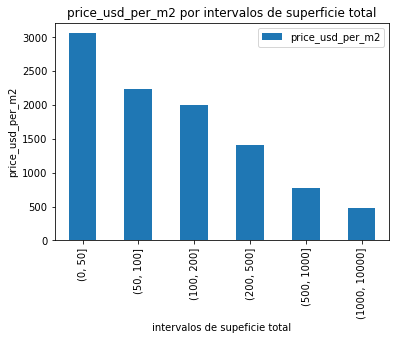

In [45]:
data.pivot_table("price_usd_per_m2", m2_categories).plot(kind="bar", title="price_usd_per_m2 por intervalos de superficie total", xlabel="intervalos de supeficie total", ylabel="price_usd_per_m2")

Análisis del price_usd_per_m2 por intervalos de supeficie covered

In [46]:
m2_categories=pd.cut(data.surface_covered_in_m2,[0,50,100,200,500,1000,10000])
data.pivot_table("price_usd_per_m2", m2_categories).round(2)

,price_usd_per_m2
surface_covered_in_m2,
"(0, 50]",2875.65
"(50, 100]",2118.55
"(100, 200]",1689.85
"(200, 500]",1519.68
"(500, 1000]",1482.51
"(1000, 10000]",1068.74


<AxesSubplot:title={'center':'price_usd_per_m2 por intervalos de supeficie covered'}, xlabel='intervalos de supeficie cubierta', ylabel='price_usd_per_m2'>

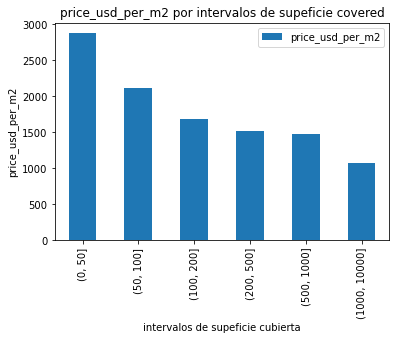

In [47]:
m2_categories=pd.cut(data.surface_covered_in_m2,[0,50,100,200,500,1000,10000])
data.pivot_table("price_usd_per_m2", m2_categories).plot(kind="bar", title="price_usd_per_m2 por intervalos de supeficie covered", xlabel="intervalos de supeficie cubierta", ylabel="price_usd_per_m2")

En ambos gráficos se observa como a mayor metros cuadrados el valor del metros cuadrado tiende a ser menor. Esta relación es aún mas notoria tomando en cuenta la superficie total 

<a id="section33"></a> 
### 3.3-Ranking cantidad de Publicaciones por state_name
[volver a TOC](#section_toc)

In [48]:

rank_publicaciones_por_state=data.pivot_table("price_aprox_usd", index="state_name", aggfunc={"price_aprox_usd":"count"}, margins=True).sort_values(by="price_aprox_usd", ascending=False)
rank_publicaciones_por_state

,price_aprox_usd
state_name,
All,100810
Capital Federal,29018
Bs.As. G.B.A. Zona Norte,24058
Bs.As. G.B.A. Zona Sur,12085
Buenos Aires Costa Atlántica,9059
Córdoba,9038
Bs.As. G.B.A. Zona Oeste,7333
Santa Fe,5413
Buenos Aires Interior,1814


In [49]:
#ranking de cantidad publicaciones por STATE NAME en %
rank_publicaciones_por_state_porcentaje=(rank_publicaciones_por_state/100810).iloc[1:,]
rank_publicaciones_por_state_porcentaje

,price_aprox_usd
state_name,
Capital Federal,0.287848
Bs.As. G.B.A. Zona Norte,0.238647
Bs.As. G.B.A. Zona Sur,0.119879
Buenos Aires Costa Atlántica,0.089862
Córdoba,0.089654
Bs.As. G.B.A. Zona Oeste,0.072741
Santa Fe,0.053695
Buenos Aires Interior,0.017994
Mendoza,0.004722


<AxesSubplot:title={'center':'Cantidad de Publicaciones por state_name sobre el total'}, xlabel='state_name', ylabel='cantidad de publicaciones en %'>

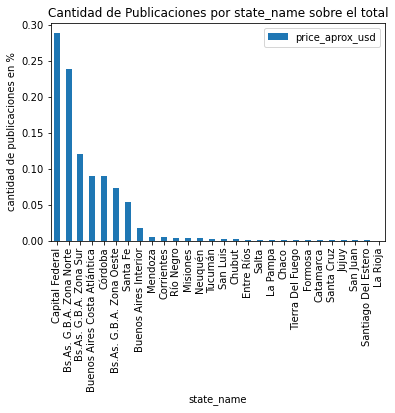

In [50]:
rank_publicaciones_por_state_porcentaje.plot(kind="bar", title="Cantidad de Publicaciones por state_name sobre el total", xlabel="state_name", ylabel="cantidad de publicaciones en %")

In [51]:
#Vista en paralelo del ranking en valores nominales y porcentuales
rank_publicaciones_por_state.merge(rank_publicaciones_por_state_porcentaje,left_on="state_name", right_on="state_name")

,price_aprox_usd_x,price_aprox_usd_y
state_name,,
Capital Federal,29018,0.287848
Bs.As. G.B.A. Zona Norte,24058,0.238647
Bs.As. G.B.A. Zona Sur,12085,0.119879
Buenos Aires Costa Atlántica,9059,0.089862
Córdoba,9038,0.089654
Bs.As. G.B.A. Zona Oeste,7333,0.072741
Santa Fe,5413,0.053695
Buenos Aires Interior,1814,0.017994
Mendoza,476,0.004722


<a id="section9"></a> 
### 3.4-Estadisticas de precios agrupado por state_name
[volver a TOC](#section_toc)

Estadisticas de precios agrupado por state_name - price_aprox_usd

<AxesSubplot:>

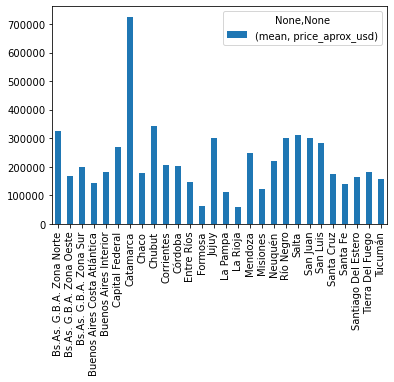

In [61]:
data_pivot_1.iloc[0:,0:1].plot(kind="bar", title="", xlabel="", ylabel="")

En el gráfico se observa la dispersión de las medias entre los distintos state_name, y en particular se observa valores sospechosos para Catamarca

### Tabla: Estadisticas de price_aprox_usd - Por state_name

In [59]:
data_pivot_1=data.pivot_table(values="price_aprox_usd", index="state_name", aggfunc=[np.mean, np.median,np.std,min, max]).round(0)
data_pivot_1

,mean,median,std,min,max
,price_aprox_usd,price_aprox_usd,price_aprox_usd,price_aprox_usd,price_aprox_usd
state_name,,,,,
Bs.As. G.B.A. Zona Norte,324317.0,230000.0,377269.0,5048.0,14000000.0
Bs.As. G.B.A. Zona Oeste,167546.0,110000.0,260655.0,5000.0,12000000.0
Bs.As. G.B.A. Zona Sur,198556.0,140000.0,226005.0,6169.0,6500000.0
Buenos Aires Costa Atlántica,143431.0,108000.0,147075.0,4952.0,7200000.0
Buenos Aires Interior,183250.0,135000.0,198388.0,6232.0,3000000.0
Capital Federal,269603.0,157261.0,457579.0,5104.0,46545445.0
Catamarca,725472.0,610000.0,563122.0,72909.0,1500000.0
Chaco,178584.0,140209.0,135575.0,28042.0,600000.0


<ipython-input-60-ac30a28d02da>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=state_name_labels, rotation=90)


[Text(0, 0, 'G.B.A. Zona Norte2'),
 Text(1, 0, 'G.B.A. Zona Oeste'),
 Text(2, 0, 'G.B.A. Zona Sur'),
 Text(3, 0, 'P.B.A. Costa Atlantica'),
 Text(4, 0, 'P.B.A. Interior'),
 Text(5, 0, 'Capital Federal'),
 Text(6, 0, 'Catamarca'),
 Text(7, 0, 'Chaco'),
 Text(8, 0, 'Chubut'),
 Text(9, 0, 'Corrientes'),
 Text(10, 0, 'Cordoba'),
 Text(11, 0, 'Entre Ríos'),
 Text(12, 0, 'Formosa'),
 Text(13, 0, 'Jujuy'),
 Text(14, 0, 'La Pampa'),
 Text(15, 0, 'La Rioja'),
 Text(16, 0, 'Mendoza'),
 Text(17, 0, 'Misiones'),
 Text(18, 0, 'Neuquen'),
 Text(19, 0, 'Rio Negro'),
 Text(20, 0, 'Salta'),
 Text(21, 0, 'San Juan'),
 Text(22, 0, 'San Luis'),
 Text(23, 0, 'Santa Cruz'),
 Text(24, 0, 'Santa Fe'),
 Text(25, 0, 'Sant. Del Estero'),
 Text(26, 0, 'T. Del Fuego'),
 Text(27, 0, 'Tucuman')]

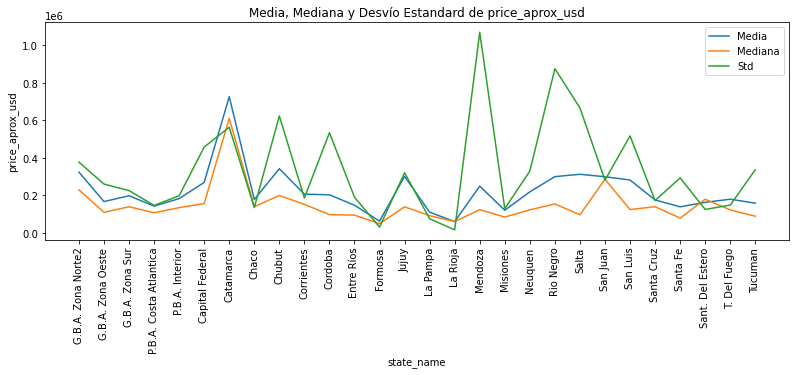

In [60]:

fig=plt.figure(figsize=plt.figaspect(0.3))
ax=plt.axes()
ax.plot(data_pivot_1.iloc[0:,0:1], label= "Media")
ax.plot(data_pivot_1.iloc[0:,1:2], label="Mediana")
ax.plot(data_pivot_1.iloc[0:,2:3], label="Std")
ax.set(title= "Media, Mediana y Desvío Estandard de price_aprox_usd", ylabel="price_aprox_usd", xlabel="state_name")
state_name_labels=["G.B.A. Zona Norte2", "G.B.A. Zona Oeste", "G.B.A. Zona Sur","P.B.A. Costa Atlantica","P.B.A. Interior","Capital Federal","Catamarca","Chaco","Chubut","Corrientes","Cordoba","Entre Ríos","Formosa","Jujuy","La Pampa","La Rioja","Mendoza","Misiones","Neuquen","Rio Negro","Salta","San Juan","San Luis","Santa Cruz","Santa Fe","Sant. Del Estero","T. Del Fuego","Tucuman"]
ax.legend(loc="best")
ax.set_xticklabels(labels=state_name_labels, rotation=90)



En el gráfico se observa los state_name cuyos desvíos son notorios, y que podrían ser origen de outliers (ej Chubut, Córdoba, Mendoza, Rio Negro)
Para casi todos los state_name se observa como la media supera a la mediana indicando un sesgo hacia la izquierda en la distribución. 

### Tabla: Estadisticas de precios agrupado por state_name - price_per_m2"

In [55]:

data.pivot_table(values="price_per_m2", index="state_name", aggfunc=[np.mean, np.median,np.std,min, max]).round(0)

,mean,median,std,min,max
,price_per_m2,price_per_m2,price_per_m2,price_per_m2,price_per_m2
state_name,,,,,
Bs.As. G.B.A. Zona Norte,4887.0,2019.0,17774.0,16.0,1100000.0
Bs.As. G.B.A. Zona Oeste,3562.0,1625.0,31401.0,8.0,2300000.0
Bs.As. G.B.A. Zona Sur,4989.0,1645.0,48213.0,8.0,4000000.0
Buenos Aires Costa Atlántica,3346.0,1750.0,7589.0,2.0,98000.0
Buenos Aires Interior,5054.0,1500.0,16097.0,34.0,295000.0
Capital Federal,6108.0,2777.0,23654.0,3.0,2600000.0
Catamarca,3793.0,3401.0,2427.0,529.0,9167.0
Chaco,12100.0,12089.0,10654.0,511.0,36333.0


<a id="section35"></a> 
### 3.5-Estadisticas de precios agrupados por property_type
[volver a TOC](#section_toc)

### Tabla: Estadisticas de precios agrupado por property_type - price_per_m2"

In [56]:
data_pivot_2=data.pivot_table(values="price_per_m2", index=["property_type"], aggfunc=[np.mean, np.median,np.std,min, max]).round(0)
data_pivot_2

,mean,median,std,min,max
,price_per_m2,price_per_m2,price_per_m2,price_per_m2,price_per_m2
property_type,,,,,
PH,3966.0,1719.0,12118.0,15.0,270000.0
apartment,8654.0,2710.0,23656.0,2.0,2600000.0
house,3827.0,1529.0,21625.0,7.0,1800000.0
store,10806.0,2100.0,102648.0,20.0,4000000.0


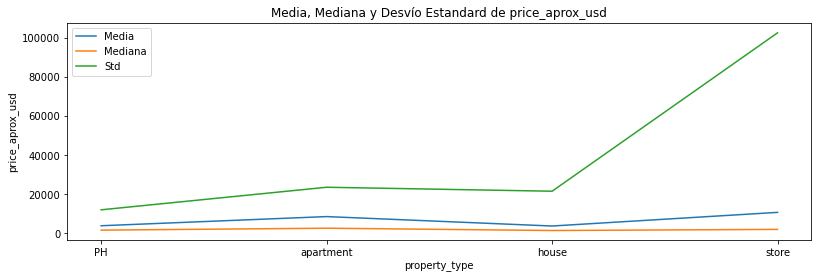

In [57]:
fig=plt.figure(figsize=plt.figaspect(0.3))
ax=plt.axes()
ax.plot(data_pivot_2.iloc[0:,0:1], label= "Media")
ax.plot(data_pivot_2.iloc[0:,1:2], label="Mediana")
ax.plot(data_pivot_2.iloc[0:,2:3], label="Std")
ax.set(title= "Media, Mediana y Desvío Estandard de price_aprox_usd", ylabel="price_aprox_usd", xlabel="property_type")
ax.legend(loc="best")



En el gráfico se observa la existencia de valore extremos por tipo de propiedad para store
Para casi todos los state_name se observa como la media difiere de la mediana, dando una primera aproximacion de la idea de la existencia
de valores extremos que elevan la media.

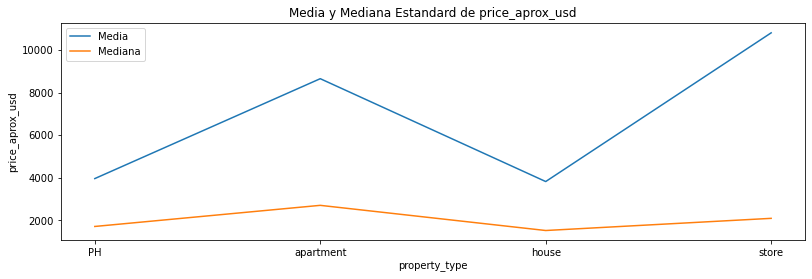

In [58]:
fig=plt.figure(figsize=plt.figaspect(0.3))
ax=plt.axes()
ax.plot(data_pivot_2.iloc[0:,0:1], label= "Media")
ax.plot(data_pivot_2.iloc[0:,1:2], label="Mediana")
#ax.plot(data_pivot_2.iloc[0:,2:3], label="Std")
ax.set(title= "Media y Mediana Estandard de price_aprox_usd", ylabel="price_aprox_usd", xlabel="property_type")
ax.legend(loc="best")

En este gráfico donde vemos solo la Media y la Mediana se aprecia mejor la diferencia que hay entre ambas, indicando un sesgo hacia la izquierda en la distribución.